In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

/home/khizirsiddiqui/anaconda3/envs/sop/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data Loading

In [2]:
dataset = pd.read_csv('./alpha.csv', header=None)
dataset_vals = dataset.iloc[:, 2:]
dataset_vals.rename(columns={i:'step{}'.format(i-1) for i in dataset_vals.columns}, inplace=True)
X = dataset_vals.values
col_ids = dataset.iloc[:, :2].rename(columns={0:'Source', 1:'Target'})
col_ids['Source_Target'] = str(col_ids['Source']) + '_' + str(col_ids['Target'])
col_ids.drop(columns=['Source', 'Target'], inplace=True)
print("CSV Shape:", dataset.shape)
print("Dataset Shape:", X.shape)
print("Col ID Shape:", col_ids.shape)

CSV Shape: (528, 327)
Dataset Shape: (528, 325)
Col ID Shape: (528, 1)


/home/khizirsiddiqui/anaconda3/envs/sop/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


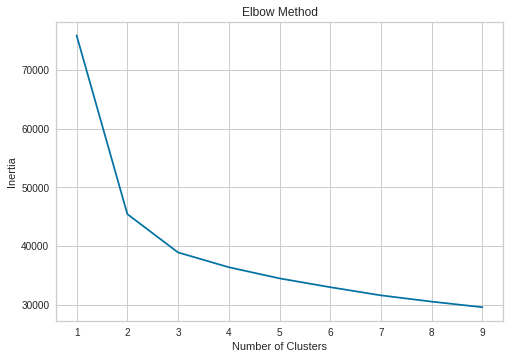

In [6]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 400, )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

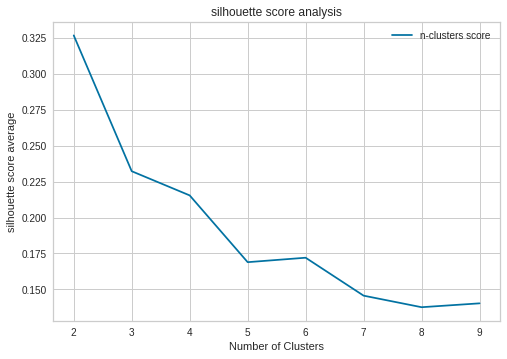

In [7]:
silhouette_avgs=[]
n_clusters = range(2, 10)
for i in n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avgs.append(silhouette_score(X, cluster_labels))

plt.plot(n_clusters, silhouette_avgs, label='n-clusters score')
plt.title('silhouette score analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette score average')
plt.legend(loc="upper right")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3264994557189159
For n_clusters = 3 The average silhouette_score is : 0.23215173788237373
For n_clusters = 4 The average silhouette_score is : 0.21535324699673722
For n_clusters = 5 The average silhouette_score is : 0.1689657201177244
For n_clusters = 6 The average silhouette_score is : 0.17205819868077832


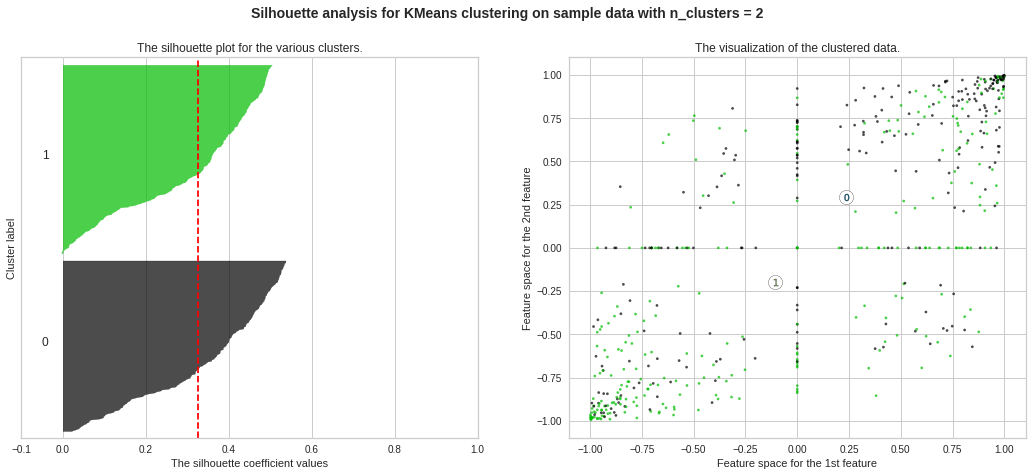

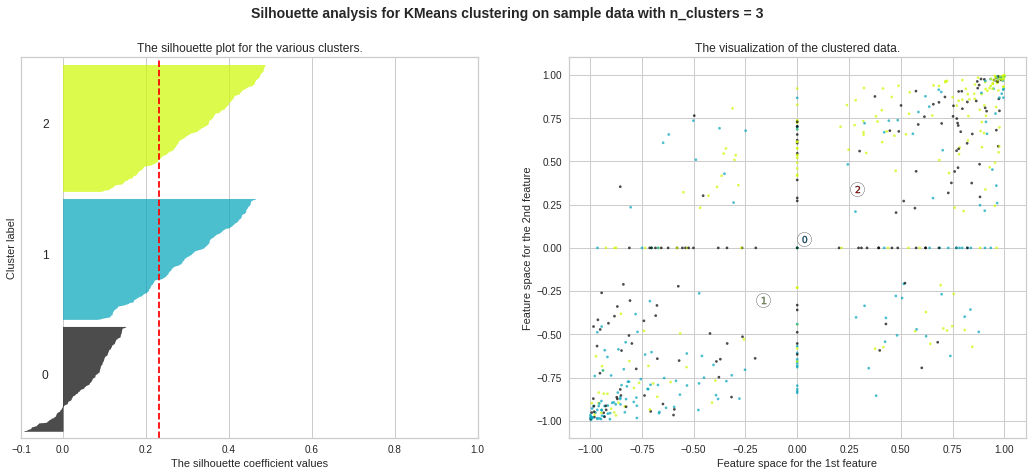

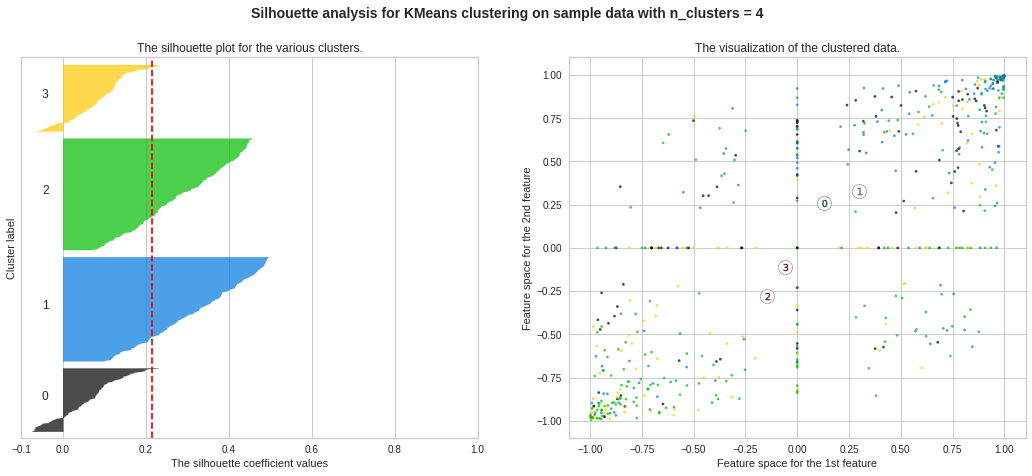

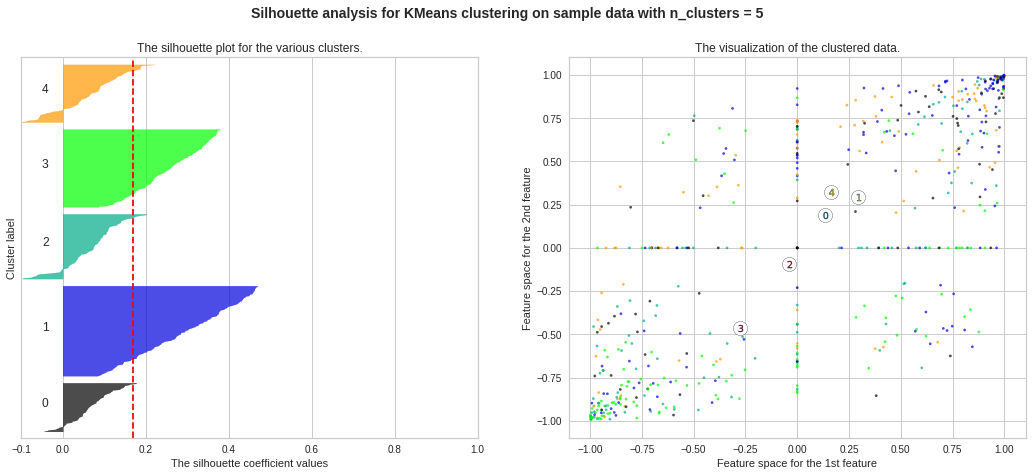

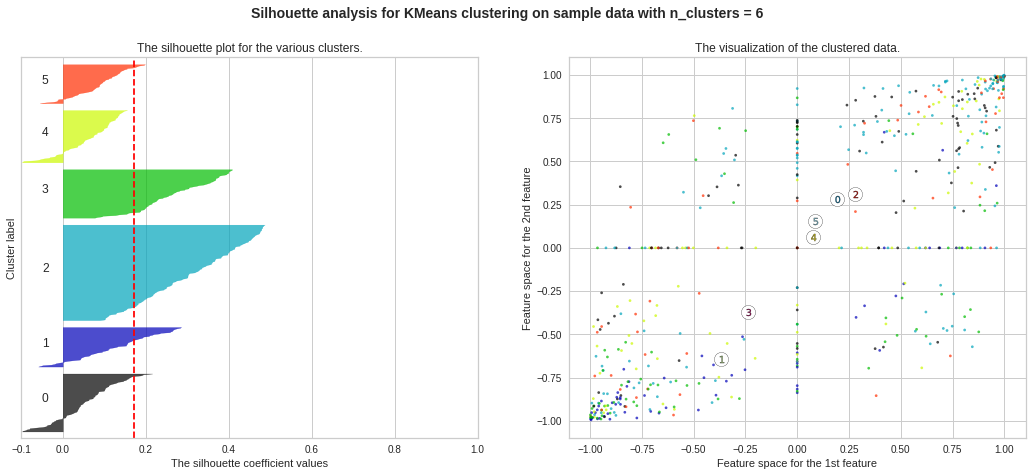

In [8]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

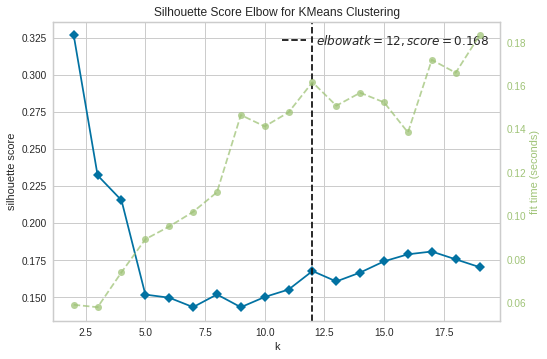

In [9]:
model = KMeans(random_state=102)
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=True)
visualizer.fit(X)    
visualizer.show()

In [10]:
print(visualizer.elbow_value_, visualizer.elbow_score_)

12 0.1676683517611349


In [12]:
# clusterer = KMeans(n_clusters=3, random_state=10)
# cluster_labels = clusterer.fit_predict(X)

In [13]:
# sns.boxplot(y=["step1"], data=dataset_vals)

In [14]:
# sns.boxplot(y=["step145"], data=dataset_vals)

## Feature Reduction using Correlation

In [15]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
# correlation_heatmap(dataset_vals)

In [16]:
THRESHOLD = 0.8
corr_matrix = dataset_vals.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > THRESHOLD)]

In [17]:
dropped_cols_dataset_vals = dataset_vals.drop(dataset_vals[to_drop], axis=1)
dropped_cols_dataset_vals.shape

(528, 142)

# K Means after Silhoutte Score Analysis

In [18]:
silhouette_avgs = []
n_clusters = range(2, 21)
for i in n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=10)
    cluster_labels = kmeans.fit_predict(dropped_cols_dataset_vals)
    score = silhouette_score(dropped_cols_dataset_vals, cluster_labels)
    silhouette_avgs.append({
        'clusters': i,
        'score': score,
    })
    print(i, " Clusters : Silhouette score = ", score)

2  Clusters : Silhouette score =  0.23591573137100566
3  Clusters : Silhouette score =  0.15775755899520794
4  Clusters : Silhouette score =  0.14300890963729693
5  Clusters : Silhouette score =  0.11955597390231529
6  Clusters : Silhouette score =  0.10098935586331925
7  Clusters : Silhouette score =  0.10557852674789824
8  Clusters : Silhouette score =  0.10342350275436044
9  Clusters : Silhouette score =  0.11023693124007378
10  Clusters : Silhouette score =  0.10974787351851716
11  Clusters : Silhouette score =  0.11382668826292032
12  Clusters : Silhouette score =  0.11360073690045991
13  Clusters : Silhouette score =  0.11437141399429838
14  Clusters : Silhouette score =  0.12071372149470368
15  Clusters : Silhouette score =  0.12764072145423005
16  Clusters : Silhouette score =  0.12650922313001767
17  Clusters : Silhouette score =  0.13124835570237312
18  Clusters : Silhouette score =  0.13166084939280653
19  Clusters : Silhouette score =  0.1391240774417378
20  Clusters : Silh

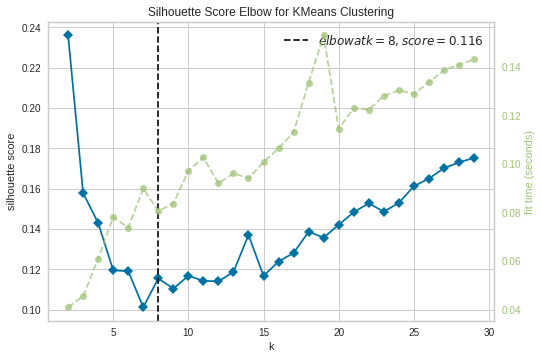

8 0.11557430956166151


In [19]:
model = KMeans(random_state=100)
visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette', timings=True)
visualizer.fit(dropped_cols_dataset_vals)    
visualizer.show()
print(visualizer.elbow_value_, visualizer.elbow_score_)

In [20]:
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=10)
labels = kmeans.fit_predict(dropped_cols_dataset_vals)
labels.shape

(528,)

In [21]:
final = pd.DataFrame({'Label': labels})
final['Source'] = dataset.iloc[:, :1].rename(columns={0:'Source'})
final['Target'] = dataset.iloc[:, 1:2].rename(columns={0:'Target'})
final.head()

,Label,Source,Target
0,5,1.0,2.0
1,2,1.0,3.0
2,5,1.0,4.0
3,0,1.0,5.0
4,7,1.0,6.0


In [22]:
cluster_source_target = []
source_target = []
for i in range(528):
    label = int(final.iloc[i]['Label'])
    cluster_source_target.append(str(int(final.iloc[label]['Source'])) + '_' + str(int(final.iloc[label]['Target'])))
    source_target.append(str(int(final.iloc[i]['Source'])) + '_' + str(int(final.iloc[i]['Target'])))
final['Source_Target'] = source_target
final['Cluster_Source_Target'] = cluster_source_target
final.drop(['Label', 'Source', 'Target'], axis=1, inplace=True)
final.head()

,Source_Target,Cluster_Source_Target
0,1_2,1_7
1,1_3,1_4
2,1_4,1_7
3,1_5,1_2
4,1_6,1_9


# Count in every cluster

In [23]:
final.groupby('Cluster_Source_Target').count()

,Source_Target
Cluster_Source_Target,
1_2,66
1_3,58
1_4,80
1_5,62
1_6,58
1_7,70
1_8,60
1_9,74


# L2 Norm between centroids

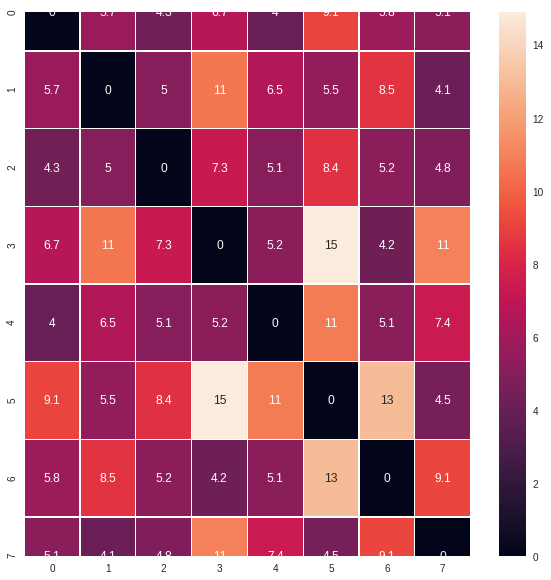

In [24]:
from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(kmeans.cluster_centers_)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dists, vmin=0, linewidths=.25, annot=True)
plt.show()


# t-SNE

In [25]:
from sklearn.manifold import TSNE

In [27]:
X_tsne = TSNE(learning_rate=500, n_components=2).fit_transform(dropped_cols_dataset_vals)

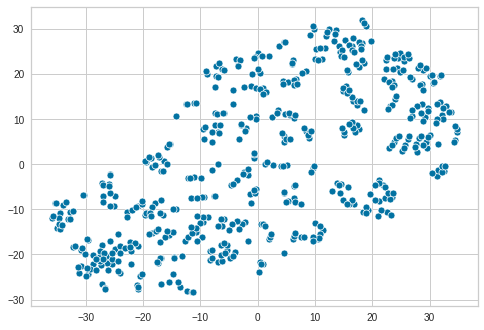

In [28]:
sns.scatterplot(X_tsne[:, 1], X_tsne[:, 0])

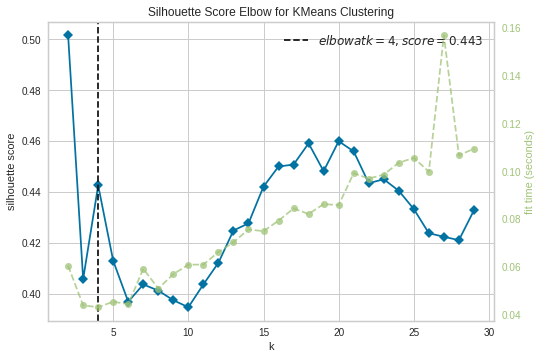

4 0.44254667


In [29]:
model_tsne = KMeans(random_state=100)
visualizer_tsne = KElbowVisualizer(model, k=(2,30), metric='silhouette', timings=True)
visualizer_tsne.fit(X_tsne)    
visualizer_tsne.show()
print(visualizer_tsne.elbow_value_, visualizer_tsne.elbow_score_)

In [30]:
kmeans_tsne = KMeans(n_clusters=visualizer_tsne.elbow_value_, random_state=10)
labels_tsne = kmeans_tsne.fit_predict(dropped_cols_dataset_vals)
labels_tsne.shape

(528,)

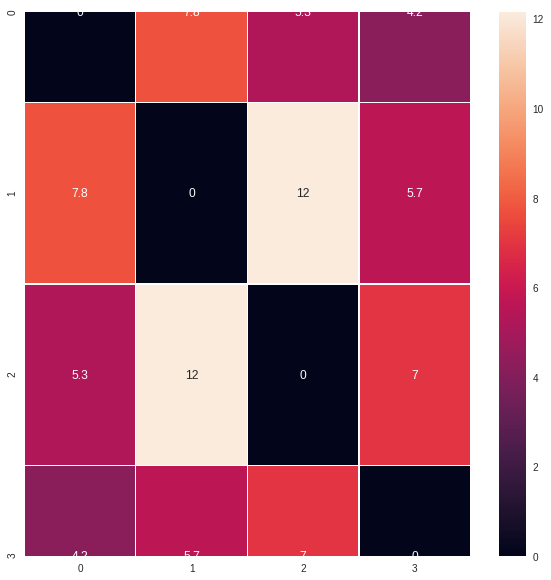

In [31]:
dists_tsne = euclidean_distances(kmeans_tsne.cluster_centers_)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dists_tsne, vmin=0, linewidths=.25, annot=True)
plt.show()


In [ ]:
# So many variations in box plot => most features important
# We are assured about few 